#### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('precision', 2)

#### 2. Read the Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/'
file = 'abalone.data'
columns = ['sex','length', 'diameter','height', 'whole_weight', 
'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv(url + file, names=columns)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


#### 3. Simple EDA for the Dataset¶

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [5]:
df[columns[:-1]].describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4177.00,4177.00,4177.00,4.18e+03,4.18e+03,4.18e+03,4.18e+03
mean,0.52,0.41,0.14,8.29e-01,3.59e-01,1.81e-01,2.39e-01
std,0.12,0.10,0.04,4.90e-01,2.22e-01,1.10e-01,1.39e-01
min,0.07,0.06,0.00,2.00e-03,1.00e-03,5.00e-04,1.50e-03
25%,0.45,0.35,0.12,4.42e-01,1.86e-01,9.35e-02,1.30e-01
50%,0.55,0.42,0.14,7.99e-01,3.36e-01,1.71e-01,2.34e-01
75%,0.61,0.48,0.17,1.15e+00,5.02e-01,2.53e-01,3.29e-01
max,0.81,0.65,1.13,2.83e+00,1.49e+00,7.60e-01,1.00e+00


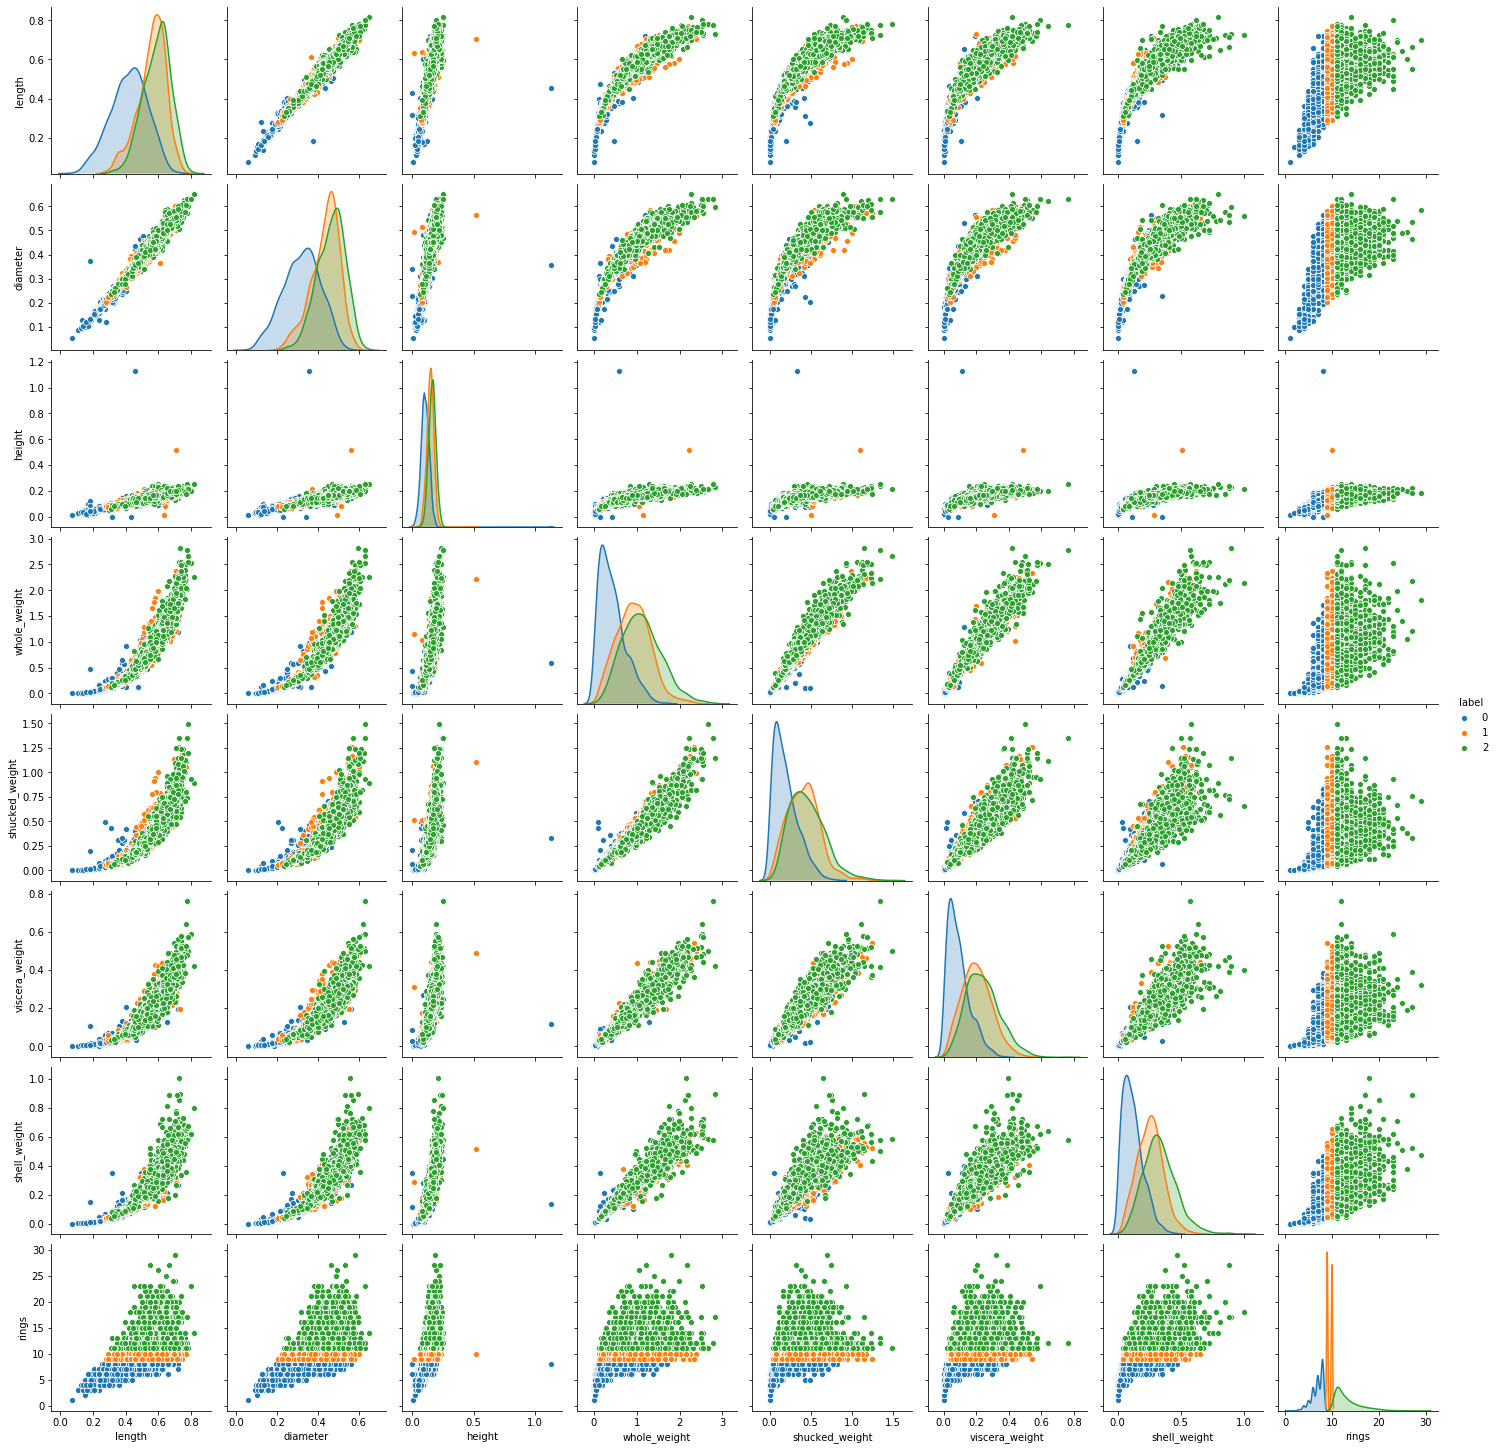

In [6]:
f = lambda r: 0 if r < 9 else 2 if r > 10 else 1
df['label'] = df['rings'].apply(f)
sns.pairplot(df, hue='label')
plt.show()

#### 4. Extract Target and Features from the Dataset¶

In [7]:
X = df[columns[:-1]]
y = df['label']

In [8]:
X.sample(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
2903,F,0.57,0.42,0.15,0.88,0.46,0.18,0.23
819,I,0.36,0.30,0.09,0.27,0.12,0.06,0.07
556,I,0.53,0.41,0.15,0.80,0.31,0.20,0.26
975,F,0.53,0.42,0.15,0.85,0.33,0.23,0.20
1760,F,0.75,0.56,0.21,1.94,0.77,0.48,0.57
2792,M,0.62,0.49,0.17,1.21,0.52,0.31,0.35
1460,M,0.48,0.39,0.09,0.64,0.29,0.10,0.20
1439,I,0.41,0.31,0.10,0.34,0.18,0.06,0.09
2518,M,0.50,0.40,0.13,0.77,0.37,0.16,0.21
426,F,0.61,0.48,0.17,1.09,0.39,0.24,0.33


In [9]:
# Verify that the target has been properly sliced and encoded 
sample_idx = np.random.randint(low=0, high=len(X), size=10)
y.iloc[sample_idx] == df['rings'].iloc[sample_idx].apply(f)

520     True
2898    True
3319    True
3874    True
3604    True
312     True
145     True
580     True
3131    True
489     True
dtype: bool

#### 5. One-hot Coding the Categorical Features of the Dataset

In [10]:
X = pd.get_dummies(X)

#### 6. Apply PCA Transformation of the Dataset to Improve the Multicolinear Problem

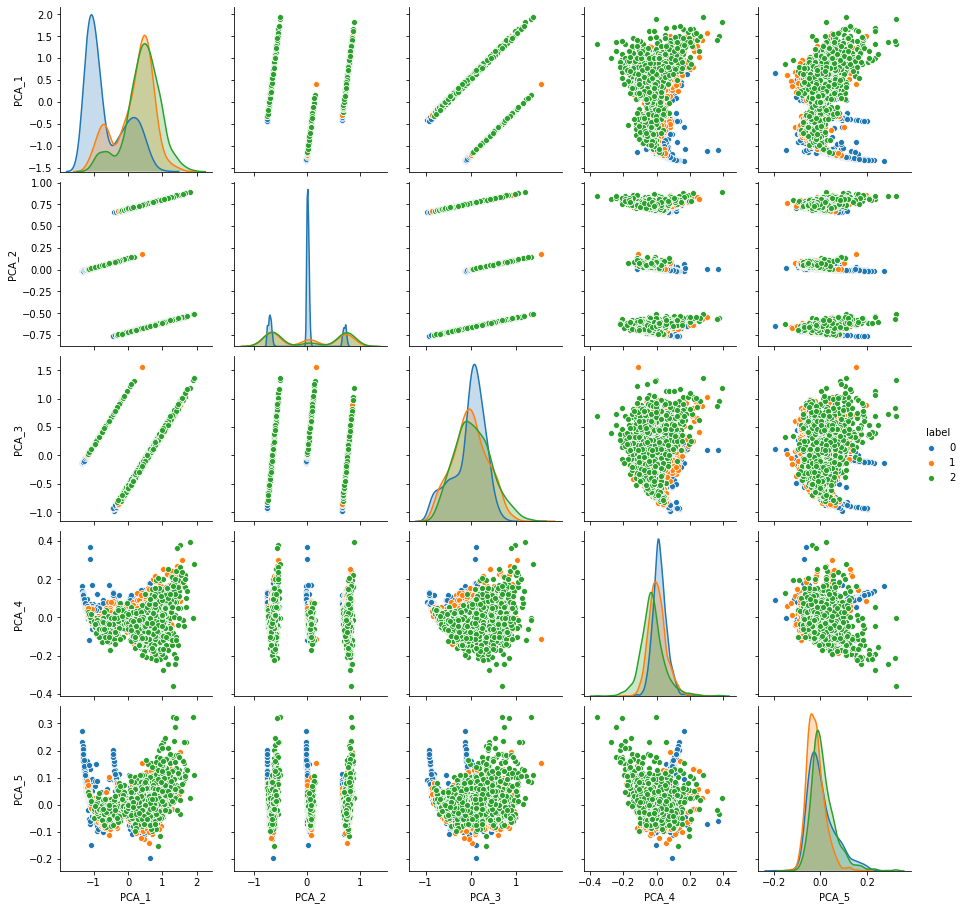

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

pca_names = ['PCA_{}'.format(k) for k in range(1, 6)]
df_pca = pd.DataFrame(X_pca, columns=pca_names)
df_pca['label'] = y
sns.pairplot(df_pca, hue='label')
plt.show()

#### 7. Model the Dataset Using Logic Regression, KNN, QDA, SVM

In [12]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

n_splits = 10
accuracy_dict = {}

# Create a dictionary of models to test
models = {'LGR': LogisticRegression(multi_class='multinomial'),
          'QDA': QDA(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'ANN': ANN(hidden_layer_sizes=(120, 300, 120), max_iter=1000)}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in models.items():
    # 10-fold cross validation, compute the accuracy for y
    accuracy = CVS(model, X_pca, y, cv=n_splits)
    # Save the model name and corresponding accuracy in the dict
    accuracy_dict[name] = accuracy
    print('The mean accuracy of {} = {:.3f}'.format(name, np.mean(accuracy))) 

The mean accuracy of LGR = 0.628
The mean accuracy of QDA = 0.619
The mean accuracy of KNN = 0.634
The mean accuracy of SVC = 0.629
The mean accuracy of ANN = 0.653


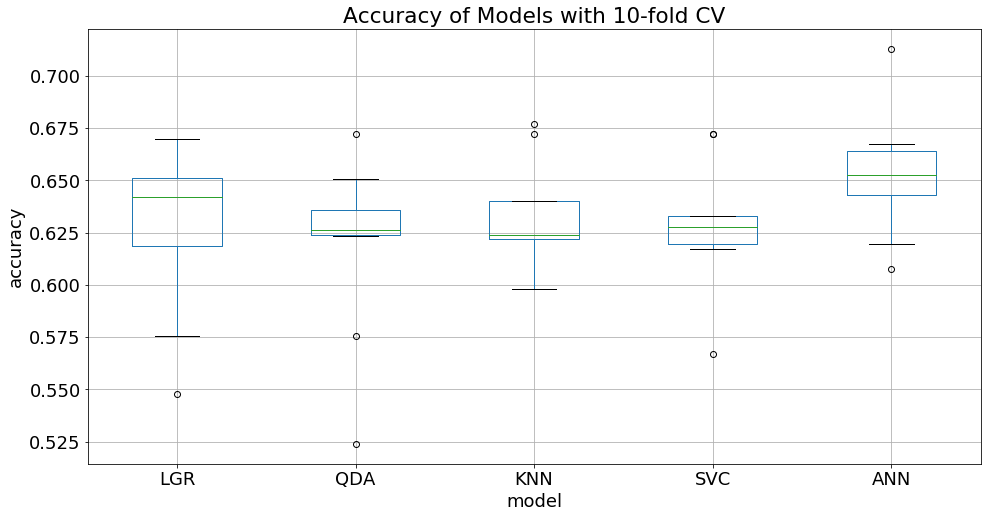

In [13]:
df_score = pd.DataFrame(accuracy_dict)
plt.rcParams.update({'font.size': 18})
df_score.boxplot(figsize=(16, 8))
plt.ylabel('accuracy')
plt.xlabel('model')
plt.title('Accuracy of Models with 10-fold CV')
plt.show()